<a href="https://colab.research.google.com/github/KONA1005/google_drive/blob/main/google_colab/Pandas10%EB%B6%84%EC%99%84%EC%84%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pandas 10분완성

## 목차
1. Object Creation 객체생성
2. Viewing Data 데이터 확인하기
3. Selection 선택
4. Missing Data 결측치
5. Operation 연산
6. Merge 병합
7. Grouping 그룹화
8. Reshaping 변형
9. Time Series 시계열
10. Categoricals 범주화
11. Plotting 그래프
12. Getting Data In/Out 데이터 입/출력
13. Gotchas 잡았다!

### 처음 시작
- 각 패키지는 pd, np,plt 라는 이름으로 불러온다

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

### 1. Object Cration 객체생성

Pandas는 값을 가지고 있는 리스트를 통해 시리즈를 만들고 정수로 만들어진 인덱스를 기본값으로 불러온다.

In [ ]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

datetime 인덱스와 레이블이 있는 열을 가지고 있는 numpy 배열을 전달하여 데이터 프레임을 만든다. (?)

In [ ]:
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,0.565631,1.438065,-0.161055,1.329387
2013-01-02,-0.486753,1.221460,-0.853459,0.317766
2013-01-03,0.160639,-0.506990,0.609341,0.121218
2013-01-04,-0.047395,-0.937127,1.318583,-0.299571
2013-01-05,-1.236105,2.091322,-0.958677,-0.652703
2013-01-06,0.173442,-1.906326,-0.282602,-0.629709


 시리즈와 같은 것으로 변환될 수 있는 객체들의 dict로 구성된 데이터 프레임을 만든다. ?

In [ ]:
df2 = pd.DataFrame({'A' : 1.,
                    'B' : pd.Timestamp('20130102'),
                    'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                    'D' : np.array([3] * 4,dtype='int32'),
                    'E' : pd.Categorical(["test","train","test","train"]),
                    'F' : 'foo' })
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


dytepes 데이터 타입 알아보기

In [ ]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

In [ ]:
# df2.<TAB>

### 2. Viewing Data 데이터 확인하기
- 가장 윗줄, 마지막 줄 확인하고 싶을 때. 디폴트 5

In [ ]:
df.tail(3) # 끝에서 마지막 3줄 불러오기
df.tail()  # 끝에서 마지막 5줄 불러오기

,A,B,C,D
2013-01-02,-0.486753,1.221460,-0.853459,0.317766
2013-01-03,0.160639,-0.506990,0.609341,0.121218
2013-01-04,-0.047395,-0.937127,1.318583,-0.299571
2013-01-05,-1.236105,2.091322,-0.958677,-0.652703
2013-01-06,0.173442,-1.906326,-0.282602,-0.629709


In [ ]:
df.head()

,A,B,C,D
2013-01-01,0.565631,1.438065,-0.161055,1.329387
2013-01-02,-0.486753,1.221460,-0.853459,0.317766
2013-01-03,0.160639,-0.506990,0.609341,0.121218
2013-01-04,-0.047395,-0.937127,1.318583,-0.299571
2013-01-05,-1.236105,2.091322,-0.958677,-0.652703


In [ ]:
df.tail(3)

,A,B,C,D
2013-01-04,-0.047395,-0.937127,1.318583,-0.299571
2013-01-05,-1.236105,2.091322,-0.958677,-0.652703
2013-01-06,0.173442,-1.906326,-0.282602,-0.629709


인덱스(행), 열(column), numpy 데이터 세부 정보 보기

In [ ]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [ ]:
df.values

array([[ 0.56563075,  1.43806457, -0.16105498,  1.32938706],
       [-0.48675322,  1.22146035, -0.85345911,  0.31776552],
       [ 0.16063948, -0.50698957,  0.60934065,  0.12121751],
       [-0.04739509, -0.93712718,  1.31858267, -0.29957128],
       [-1.23610514,  2.09132218, -0.95867663, -0.65270315],
       [ 0.1734424 , -1.90632634, -0.28260169, -0.62970888]])

통계정보 요약 describe()

In [ ]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.145090,0.233401,-0.054645,0.031064
std,0.635083,1.573283,0.876960,0.746920
min,-1.236105,-1.906326,-0.958677,-0.652703
25%,-0.376914,-0.829593,-0.710745,-0.547174
50%,0.056622,0.357235,-0.221828,-0.089177
75%,0.170242,1.383914,0.416742,0.268629
max,0.565631,2.091322,1.318583,1.329387


데이터를 전치한다

In [ ]:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,0.565631,-0.486753,0.160639,-0.047395,-1.236105,0.173442
B,1.438065,1.221460,-0.506990,-0.937127,2.091322,-1.906326
C,-0.161055,-0.853459,0.609341,1.318583,-0.958677,-0.282602
D,1.329387,0.317766,0.121218,-0.299571,-0.652703,-0.629709


축 별로 정렬한다

In [ ]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,1.329387,-0.161055,1.438065,0.565631
2013-01-02,0.317766,-0.853459,1.221460,-0.486753
2013-01-03,0.121218,0.609341,-0.506990,0.160639
2013-01-04,-0.299571,1.318583,-0.937127,-0.047395
2013-01-05,-0.652703,-0.958677,2.091322,-1.236105
2013-01-06,-0.629709,-0.282602,-1.906326,0.173442


값 별로 정렬한다

In [ ]:
df.sort_values(by='B')

,A,B,C,D
2013-01-06,0.173442,-1.906326,-0.282602,-0.629709
2013-01-04,-0.047395,-0.937127,1.318583,-0.299571
2013-01-03,0.160639,-0.506990,0.609341,0.121218
2013-01-02,-0.486753,1.221460,-0.853459,0.317766
2013-01-01,0.565631,1.438065,-0.161055,1.329387
2013-01-05,-1.236105,2.091322,-0.958677,-0.652703


### 3. Selection 선택
- Pandas에 최적화된 접근방법인 .at .iat .loc .iloc 추천

Getting 데이터 얻기. df.A와 동일한 시리즈를 생성하는 단일 열 선택하기

In [ ]:
df['A']

2013-01-01    0.565631
2013-01-02   -0.486753
2013-01-03    0.160639
2013-01-04   -0.047395
2013-01-05   -1.236105
2013-01-06    0.173442
Freq: D, Name: A, dtype: float64

행을 분할하는 []를 통해 선택

In [ ]:
df[0:3]

,A,B,C,D
2013-01-01,0.565631,1.438065,-0.161055,1.329387
2013-01-02,-0.486753,1.221460,-0.853459,0.317766
2013-01-03,0.160639,-0.506990,0.609341,0.121218


In [ ]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,-0.486753,1.221460,-0.853459,0.317766
2013-01-03,0.160639,-0.506990,0.609341,0.121218
2013-01-04,-0.047395,-0.937127,1.318583,-0.299571


라벨을 통한 선택

In [ ]:
df.loc[dates[0]] #라벨을 사용하여 횡단면을 얻기

A    0.565631
B    1.438065
C   -0.161055
D    1.329387
Name: 2013-01-01 00:00:00, dtype: float64

라벨을 사용하여 여러 축의 데이터를 얻기

In [ ]:
df.loc[:,['A','B']]

,A,B
2013-01-01,0.565631,1.438065
2013-01-02,-0.486753,1.221460
2013-01-03,0.160639,-0.506990
2013-01-04,-0.047395,-0.937127
2013-01-05,-1.236105,2.091322
2013-01-06,0.173442,-1.906326


양쪽 종단점을 포함한 라벨 슬라이싱 보기

In [ ]:
df.loc['20130102':'20130104',['A','B']]

,A,B
2013-01-02,-0.486753,1.221460
2013-01-03,0.160639,-0.506990
2013-01-04,-0.047395,-0.937127


반환되는 객체의 차원 줄이기

In [ ]:
df.loc['20130102',['A','B']]

A   -0.486753
B    1.221460
Name: 2013-01-02 00:00:00, dtype: float64

스칼라 값 얻기

In [ ]:
df.loc[dates[0],'A']

0.5656307525308637

스칼라 값 더 빠르게 구하기. 앞에 메소드와 동일

In [ ]:
df.at[dates[0],'A']

0.5656307525308637

위치로 선택하기 넘겨받은 정수의 위치 기준 선택

In [ ]:
df.iloc[3]

A   -0.047395
B   -0.937127
C    1.318583
D   -0.299571
Name: 2013-01-04 00:00:00, dtype: float64

정수로 표기된 슬라이스들을 통해 numpy / python과 유사하게 작동한다.

In [ ]:
df.iloc[3:5,0:2]

,A,B
2013-01-04,-0.047395,-0.937127
2013-01-05,-1.236105,2.091322


정수로 표기된 위치값의 리스트들을 통해 numpy / python의 스타일과 유사해진다

In [ ]:
df.iloc[[1,2,4],[0,2]]

,A,C
2013-01-02,-0.486753,-0.853459
2013-01-03,0.160639,0.609341
2013-01-05,-1.236105,-0.958677


명시적으로 행을 나누고자 하는 경우에는

In [ ]:
df.iloc[1:3,:]

,A,B,C,D
2013-01-02,-0.486753,1.22146,-0.853459,0.317766
2013-01-03,0.160639,-0.50699,0.609341,0.121218


명시적으로 열을 나누고자 하는 경우

In [ ]:
df.iloc[:,1:3]

,B,C
2013-01-01,1.438065,-0.161055
2013-01-02,1.221460,-0.853459
2013-01-03,-0.506990,0.609341
2013-01-04,-0.937127,1.318583
2013-01-05,2.091322,-0.958677
2013-01-06,-1.906326,-0.282602


명시적으로 특정한 값을 얻고자 하는 경우

In [ ]:
df.iloc[1,1]

1.2214603450771309

스칼라 값 빠르게 얻기. 위에랑 동일

In [ ]:
df.iat[1,1]

1.2214603450771309

boolean indexing 
데이터를 선택하기 위해 단일 열의 값을 사용한다

In [ ]:
df[df.A >0]

,A,B,C,D
2013-01-01,0.565631,1.438065,-0.161055,1.329387
2013-01-03,0.160639,-0.506990,0.609341,0.121218
2013-01-06,0.173442,-1.906326,-0.282602,-0.629709


boolean 조건을 충족하는 데이터프레임에서 값을 선택한다.

In [ ]:
df[df > 0]

,A,B,C,D
2013-01-01,0.565631,1.438065,NaN,1.329387
2013-01-02,NaN,1.221460,NaN,0.317766
2013-01-03,0.160639,NaN,0.609341,0.121218
2013-01-04,NaN,NaN,1.318583,NaN
2013-01-05,NaN,2.091322,NaN,NaN
2013-01-06,0.173442,NaN,NaN,NaN


필터링을 위한 메소드 isin()을 사용한다

In [ ]:
df2 = df.copy()
df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three']
df2

,A,B,C,D,E
2013-01-01,0.565631,1.438065,-0.161055,1.329387,one
2013-01-02,-0.486753,1.221460,-0.853459,0.317766,one
2013-01-03,0.160639,-0.506990,0.609341,0.121218,two
2013-01-04,-0.047395,-0.937127,1.318583,-0.299571,three
2013-01-05,-1.236105,2.091322,-0.958677,-0.652703,four
2013-01-06,0.173442,-1.906326,-0.282602,-0.629709,three


In [ ]:
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2013-01-03,0.160639,-0.506990,0.609341,0.121218,two
2013-01-05,-1.236105,2.091322,-0.958677,-0.652703,four


setting 설정
- 새 열을 설정하면 데이터가 인덱스 별로 자동 정렬된다

In [ ]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130102', periods=6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [ ]:
df['F'] = s1

라벨에 의해 값을 설정한다

In [ ]:
df.at[dates[0],'A'] = 0

위치에 의해 값을 설정한다

In [ ]:
df.iat[0,1] = 0

Numpy 배열을 사용한 할당에 의해 값을 설정한다.

In [ ]:
df.loc[:,'D'] = np.array([5]* len(df))

위 설정대로 작동한 결과

In [ ]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.161055,5,NaN
2013-01-02,-0.486753,1.221460,-0.853459,5,1.0
2013-01-03,0.160639,-0.506990,0.609341,5,2.0
2013-01-04,-0.047395,-0.937127,1.318583,5,3.0
2013-01-05,-1.236105,2.091322,-0.958677,5,4.0
2013-01-06,0.173442,-1.906326,-0.282602,5,5.0


where 연산을 설정한다

In [ ]:
df2 = df.copy()
df2[df2 > 0] = -df2
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.161055,-5,NaN
2013-01-02,-0.486753,-1.221460,-0.853459,-5,-1.0
2013-01-03,-0.160639,-0.506990,-0.609341,-5,-2.0
2013-01-04,-0.047395,-0.937127,-1.318583,-5,-3.0
2013-01-05,-1.236105,-2.091322,-0.958677,-5,-4.0
2013-01-06,-0.173442,-1.906326,-0.282602,-5,-5.0


### 4. Missing Data 결측치
- Pandas는 결측치를 표현하기 위해 주로 np.nana값을 사용한다. 이 방법은 기본 설정값이지만 계산엔 포함되지 않는다.
- Reindexing으로 지정된 축 상의 인덱스를 변경/ 추가/ 삭제 할 수 잇다. Reindexing은 데이터의 복사본을 반환한다.


In [ ]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1.loc[dates[0]:dates[1], 'E'] = 1
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.161055,5,NaN,1.0
2013-01-02,-0.486753,1.221460,-0.853459,5,1.0,1.0
2013-01-03,0.160639,-0.506990,0.609341,5,2.0,NaN
2013-01-04,-0.047395,-0.937127,1.318583,5,3.0,NaN


결측치가 있는 행 지우기

In [ ]:
df1.dropna(how='any')

,A,B,C,D,F,E
2013-01-02,-0.486753,1.22146,-0.853459,5,1.0,1.0


결측치를 채워 넣는다.

In [ ]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.161055,5,5.0,1.0
2013-01-02,-0.486753,1.221460,-0.853459,5,1.0,1.0
2013-01-03,0.160639,-0.506990,0.609341,5,2.0,5.0
2013-01-04,-0.047395,-0.937127,1.318583,5,3.0,5.0


nan인 값에 boolean을 통한 표식을 얻는다.
- 데이터프레임의 모든 값이 boolean형태로 표시되도록 하며, nan인 값에만 True가 표시되게 하는 함수

In [ ]:
pd.isna(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


### 5. Operation연산

Stats 통계
- 일반적으로 결측치를 제외한 후 연산된다.

In [ ]:
df.mean()

A   -0.239362
B   -0.006277
C   -0.054645
D    5.000000
F    3.000000
dtype: float64

다른 축에서 동일한 연산을 수행한다

In [ ]:
df.mean(1)

2013-01-01    1.209736
2013-01-02    1.176250
2013-01-03    1.452598
2013-01-04    1.666812
2013-01-05    1.779308
2013-01-06    1.596903
Freq: D, dtype: float64

정렬이 필요하며, 차원이 다른 객체로 연산해보기
판다스는 지정된 차원을 따라 자동적으로 브로드캐스팅 된다.
- broadcast = numpy에서 유래한 용어, n차원이나 스칼라 값으로 연산을 수행할 때 도출되는 결과의 규칙을 설명하는 것

In [ ]:
s = pd.Series([1,3,5,np.nan,6,8],index =dates).shift(2)
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [ ]:
df.sub(s, axis='index')

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.839361,-1.506990,-0.390659,4.0,1.0
2013-01-04,-3.047395,-3.937127,-1.681417,2.0,0.0
2013-01-05,-6.236105,-2.908678,-5.958677,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


Apply 적용
- 데이터에 함수를 적용한다

In [ ]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.161055,5,NaN
2013-01-02,-0.486753,1.221460,-1.014514,10,1.0
2013-01-03,-0.326114,0.714471,-0.405173,15,3.0
2013-01-04,-0.373509,-0.222656,0.913409,20,6.0
2013-01-05,-1.609614,1.868666,-0.045267,25,10.0
2013-01-06,-1.436172,-0.037661,-0.327869,30,15.0


In [ ]:
df.apply(lambda x: x.max() - x.min()) # 뭐야이건

A    1.409548
B    3.997649
C    2.277259
D    0.000000
F    4.000000
dtype: float64

Histogramming 히스토그래밍

In [ ]:
s = pd.Series(np.random.randint(0,7, size=10))
s

0    3
1    1
2    6
3    4
4    3
5    5
6    3
7    2
8    0
9    3
dtype: int64

In [ ]:
s.value_counts()

3    4
1    1
6    1
4    1
5    1
2    1
0    1
dtype: int64

String Method 문자열 메소드
- 시리즈는 문자열 처리 메소드 모음(set)을 가지고 있다. 
- 이 모음은 배열의 각 요소를 쉽게 조작할 수 있도록 만들어 주는 문자열의 속성에 포함되어 있다.
- 문자열의 패턴 일치 확인은 기본적으로 정규 표현식을 사용하며, 몇몇 경우 항상 정규 표현식을 사용함에 유의하자

In [ ]:
s = pd.Series(['A','B','C','Aaba','Baca', np.nan, 'CABA','dog','cat'])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

### 6. Merge 병합

Concat 연결
- 결함(join)/ 병합(merge) 형태의 연산에 대한 인덱스, 관계 대수 기능을 위한 다양한 형태의 논리를 포함한 시리즈, 데이터프레임, 패널 객체를 손쉽게 결합할 수 있도록 하는 다양한 기능을 Pandas에서 제공한다

In [ ]:
df = pd.DataFrame(np.random.randn(10,4))
df

,0,1,2,3
0,0.564083,-1.841146,-2.395212,0.863428
1,-1.669315,0.179776,1.228941,0.468175
2,2.732182,-0.000373,-0.177915,-1.080882
3,-0.132465,-1.303884,0.026758,1.611763
4,-0.781996,1.141845,0.311231,0.793132
5,-0.478188,0.408476,-0.172504,-0.566096
6,-0.926642,0.732137,-1.750504,-0.634155
7,-0.978385,-1.008594,-1.148538,0.050276
8,-0.742249,-0.947237,-1.110353,-0.284155
9,0.725043,-0.407679,1.824519,-0.243598


In [ ]:
# break it into pieces
pieces = [df[:3], df[3:7], df[7:]]

In [ ]:
pd.concat(pieces)

,0,1,2,3
0,0.564083,-1.841146,-2.395212,0.863428
1,-1.669315,0.179776,1.228941,0.468175
2,2.732182,-0.000373,-0.177915,-1.080882
3,-0.132465,-1.303884,0.026758,1.611763
4,-0.781996,1.141845,0.311231,0.793132
5,-0.478188,0.408476,-0.172504,-0.566096
6,-0.926642,0.732137,-1.750504,-0.634155
7,-0.978385,-1.008594,-1.148538,0.050276
8,-0.742249,-0.947237,-1.110353,-0.284155
9,0.725043,-0.407679,1.824519,-0.243598


Join 결합
- SQL방식으로 병합한다

In [ ]:
left = pd.DataFrame({'key': ['foo','foo'], 'lavl':[1,2]})
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})


In [ ]:
left

,key,lavl
0,foo,1
1,foo,2


In [ ]:
right

,key,rval
0,foo,4
1,foo,5


In [ ]:
pd.merge(left, right, on= 'key')

,key,lavl,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


다른 예시 -------------------------------

In [ ]:
left = pd.DataFrame({'key' : ['foo', 'bar'], 'lval' : [1, 2]})
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})

In [ ]:
left

,key,lval
0,foo,1
1,bar,2


In [ ]:
right

,key,rval
0,foo,4
1,bar,5


Append 추가
- 데이터 프레임에 행을 추가한다

In [ ]:
df = pd.DataFrame(np.random.randn(8,4), columns=['A','B','C','D'])
df

,A,B,C,D
0,-0.121461,-0.468442,-1.765241,-1.273644
1,-0.394976,0.362535,-0.150556,-0.640696
2,-0.678450,1.552727,-0.714977,0.321827
3,1.666823,-0.839595,-2.118069,0.438510
4,0.657276,0.812624,0.504885,0.496180
5,1.055357,0.119934,-1.450620,-1.061257
6,-0.943775,1.976406,-1.360695,-0.561939
7,0.835381,-0.550200,-1.760801,-0.583601


In [ ]:
s = df.iloc[3]

In [ ]:
df.append(s, ignore_index=True)

,A,B,C,D
0,-0.121461,-0.468442,-1.765241,-1.273644
1,-0.394976,0.362535,-0.150556,-0.640696
2,-0.678450,1.552727,-0.714977,0.321827
3,1.666823,-0.839595,-2.118069,0.438510
4,0.657276,0.812624,0.504885,0.496180
5,1.055357,0.119934,-1.450620,-1.061257
6,-0.943775,1.976406,-1.360695,-0.561939
7,0.835381,-0.550200,-1.760801,-0.583601
8,1.666823,-0.839595,-2.118069,0.438510


### 7. Grouping 그룹화
- 몇몇 기준에 따라 여러 그룹으로 데이터를 분할(splitting)
- 각 그룹에 독립적으로 함수를 적용(applying)
- 결과물들을 하나의 데이터 구조로 결합(combining)

In [ ]:
df = pd.DataFrame(
    {
        'A' : ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
        'B' : ['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three'],
        'C' : np.random.randn(8),
        'D' : np.random.randn(8)
    })
df

,A,B,C,D
0,foo,one,0.585048,-0.613021
1,bar,one,0.289446,1.534211
2,foo,two,-1.085730,0.096078
3,bar,three,1.505742,-0.139517
4,foo,two,-0.392644,-0.676700
5,bar,two,-0.523903,-1.378408
6,foo,one,-0.098261,-0.206268
7,foo,three,0.989532,2.149763


생성된 데이터프레임을 그룹화 하고 각 그룹에 sum함수를 적용한다

In [ ]:
df.groupby('A').sum()

,C,D
A,,
bar,1.271286,0.016287
foo,-0.002055,0.749853


여러 열을 기준으로 그룹화하면 계층적 인덱스가 형성된다. 여기에도 sum 함수 적용 가능

In [ ]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one    0.289446  1.534211
    three  1.505742 -0.139517
    two   -0.523903 -1.378408
foo one    0.486787 -0.819289
    three  0.989532  2.149763
    two   -1.478373 -0.580621

### 8. Reshaping 변형

Stack 스택

In [ ]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                     'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two',
                     'one', 'two', 'one', 'two']]))

In [ ]:
index = pd.MultiIndex.from_tuples(tuples, names=['first','second'])

In [ ]:
df = pd.DataFrame(np.random.randn(8,2), index=index, columns=['A','B'])

In [ ]:
df2 = df[:4]

In [ ]:
df2

A         B
first second                    
bar   one    -0.347843  0.655614
      two    -0.393436  0.124836
baz   one    -0.396035  0.468983
      two     1.603659  0.855420

stack 메소드는 데이터프레임 열들의 계층을 압축 한다

In [ ]:
stacked = df2.stack()

In [ ]:
stacked

first  second   
bar    one     A   -0.347843
               B    0.655614
       two     A   -0.393436
               B    0.124836
baz    one     A   -0.396035
               B    0.468983
       two     A    1.603659
               B    0.855420
dtype: float64

stack된 데이터프레임 또는 멀티인덱스를 인덱스로 사용하는 시리즈인 경우, 스택의 역 연산은 언스택이며 기본적으로 마지막 계층을 언스택 한다

In [ ]:
stacked.unstack()

A         B
first second                    
bar   one    -0.347843  0.655614
      two    -0.393436  0.124836
baz   one    -0.396035  0.468983
      two     1.603659  0.855420

In [ ]:
stacked.unstack(1)

second        one       two
first                      
bar   A -0.347843 -0.393436
      B  0.655614  0.124836
baz   A -0.396035  1.603659
      B  0.468983  0.855420

In [ ]:
stacked.unstack(0)

first          bar       baz
second                      
one    A -0.347843 -0.396035
       B  0.655614  0.468983
two    A -0.393436  1.603659
       B  0.124836  0.855420

피벗 테이블

In [ ]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                   'B' : ['A', 'B', 'C'] * 4,
                   'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                   'D' : np.random.randn(12),
                   'E' : np.random.randn(12)})
df

,A,B,C,D,E
0,one,A,foo,0.358991,0.133163
1,one,B,foo,-0.740338,-2.258545
2,two,C,foo,-1.295499,0.718898
3,three,A,bar,-0.390772,-0.247359
4,one,B,bar,-0.420468,0.049262
5,one,C,bar,-0.222736,-0.101754
6,two,A,foo,-0.778818,-0.217479
7,three,B,foo,2.458702,-0.961104
8,one,C,foo,0.231885,0.384149
9,one,A,bar,2.366187,-0.140594


이 데이터로부터 피벗 테이블을 매우 쉽게 생성할 수 있다.

In [ ]:
pd.pivot_table(df, values='D', index=['A','B'], columns=['C'])

C             bar       foo
A     B                    
one   A  2.366187  0.358991
      B -0.420468 -0.740338
      C -0.222736  0.231885
three A -0.390772       NaN
      B       NaN  2.458702
      C  0.720240       NaN
two   A       NaN -0.778818
      B  0.085006       NaN
      C       NaN -1.295499

### 9. Time Series 시계열
- Pandas는 자주 일어나는 변환 사이에 수행하는 리샘플링 연산을 위한 간단하고 강력하며 효율적인 함수를 제공한다.
- 재무(금융) 응용에서 매우 일반적이지만 국한되지는 않는다

In [ ]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')

In [ ]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

In [ ]:
ts.resample('5Min').sum()

2012-01-01    24901
Freq: 5T, dtype: int64

시간대를 표현한다

In [ ]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')

In [ ]:
ts = pd.Series(np.random.randn(len(rng)), rng)

In [ ]:
ts

2012-03-06   -0.627633
2012-03-07   -0.281939
2012-03-08   -1.926290
2012-03-09    0.490238
2012-03-10    1.202768
Freq: D, dtype: float64

In [ ]:
ts_utc = ts.tz_localize('UTC')

In [ ]:
ts_utc

2012-03-06 00:00:00+00:00   -0.627633
2012-03-07 00:00:00+00:00   -0.281939
2012-03-08 00:00:00+00:00   -1.926290
2012-03-09 00:00:00+00:00    0.490238
2012-03-10 00:00:00+00:00    1.202768
Freq: D, dtype: float64

다른 시간대로 변환한다

In [ ]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00   -0.627633
2012-03-06 19:00:00-05:00   -0.281939
2012-03-07 19:00:00-05:00   -1.926290
2012-03-08 19:00:00-05:00    0.490238
2012-03-09 19:00:00-05:00    1.202768
Freq: D, dtype: float64

시간표현 <-> 기간표현으로 변환

In [ ]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')

In [ ]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [ ]:
ts

2012-01-31   -1.070689
2012-02-29    0.154302
2012-03-31    1.606652
2012-04-30   -0.660158
2012-05-31   -1.347581
Freq: M, dtype: float64

In [ ]:
ps = ts.to_period()

In [ ]:
ps

2012-01   -1.070689
2012-02    0.154302
2012-03    1.606652
2012-04   -0.660158
2012-05   -1.347581
Freq: M, dtype: float64

In [ ]:
ps.to_timestamp()

2012-01-01   -1.070689
2012-02-01    0.154302
2012-03-01    1.606652
2012-04-01   -0.660158
2012-05-01   -1.347581
Freq: MS, dtype: float64

기간 <-> 시간 변환은 편리한 산술 기능들을 사용할 수 있도록 만들어준다.
  + 다음 예제에서 11월에 끝나는 연말 결산의 분기별 빈도를 분기말 익월의 월말일 오전 9시로 변환해보자

In [ ]:
prng = pd.period_range('1990Q1', '2000Q4',freq='Q-NOV')

In [ ]:
ts = pd.Series(np.random.randn(len(prng)), prng)

In [ ]:
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9

In [ ]:
ts.head()

1990-03-01 09:00    0.378130
1990-06-01 09:00    0.059600
1990-09-01 09:00    2.616659
1990-12-01 09:00   -2.800769
1991-03-01 09:00   -0.163903
Freq: H, dtype: float64

### 10. Categoricals 범주화
- Pandas는 데이터프레임 내에 범주형 데이터를 포함할 수 있다

In [ ]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})

가공하지 않은 성적을 범주형 데이터로 변환한다

In [ ]:
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

범주에 더 의미 있는 이름을 붙여주자.
- Series.cat.categories로 할당하는 것이 적합하다

In [ ]:
df["grade"].cat.categories = ["very good","good","very bad"]

범주의 순서를 바꾸고 동시에 누락된 범주를 추가한다.
- Series.cat에 속하는 메소드는 기본적으로 새로운 Series를 반환한다

In [ ]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])

In [ ]:
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

정렬은 사전 순서가 아닌 해당 범주에서 지정된 순서대로 배열한다

In [ ]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


범주의 열을 기준으로 그룹화하면 빈 범주도 표시된다

In [ ]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

### 11.Plotting 그래프

In [ ]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))


In [ ]:
ts = ts.cumsum()

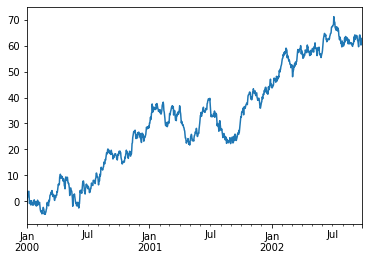

In [ ]:
ts.plot()

오 신기하다..
데이터 프레임에서 plot() 메소드는 라벨이 존재하는 모든 열을 그릴 때 편리하다

In [ ]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D'])  

In [ ]:
df = df.cumsum()

<Figure size 432x288 with 0 Axes>

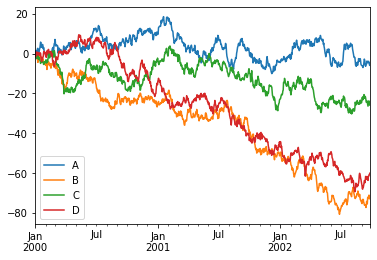

In [ ]:
plt.figure(); df.plot(); plt.legend(loc='best')

### 12. Getting Data In/Out 데이터 입출력

CSV
- csv 파일에 쓴다

In [ ]:
df.to_csv('foo.csv')

- csv 파일 읽는다

In [ ]:
pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,0.845096,-0.690865,-0.238147,0.210311
1,2000-01-02,0.948947,-1.392724,-0.093890,-1.408432
2,2000-01-03,-0.029409,0.131885,-1.680626,-1.563230
3,2000-01-04,1.580155,-0.736594,-2.441719,-0.488423
4,2000-01-05,-0.502766,-1.531907,-2.533452,0.724958
...,...,...,...,...,...
995,2002-09-22,-3.909884,-72.020088,-23.806344,-61.620921
996,2002-09-23,-4.575456,-71.077256,-23.807748,-60.963178
997,2002-09-24,-5.285656,-72.376252,-25.517657,-60.926488
998,2002-09-25,-5.963955,-72.945043,-25.935005,-60.311673


HDF5
- HDFSores에 읽고 쓴다

HDF5 Store에 쓴다

In [ ]:
df.to_hdf('foo.h5','df')

HDF5 Store에서 읽어온다

In [ ]:
pd.read_hdf('foo.h5','df')

,A,B,C,D
2000-01-01,0.845096,-0.690865,-0.238147,0.210311
2000-01-02,0.948947,-1.392724,-0.093890,-1.408432
2000-01-03,-0.029409,0.131885,-1.680626,-1.563230
2000-01-04,1.580155,-0.736594,-2.441719,-0.488423
2000-01-05,-0.502766,-1.531907,-2.533452,0.724958
...,...,...,...,...
2002-09-22,-3.909884,-72.020088,-23.806344,-61.620921
2002-09-23,-4.575456,-71.077256,-23.807748,-60.963178
2002-09-24,-5.285656,-72.376252,-25.517657,-60.926488
2002-09-25,-5.963955,-72.945043,-25.935005,-60.311673


Excel
- 엑셀 파일에 쓴다

In [ ]:
df.to_excel('foo.xlsx', sheet_name='Sheet1')

엑셀 파일 읽어오기

In [ ]:
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

,Unnamed: 0,A,B,C,D
0,2000-01-01,0.845096,-0.690865,-0.238147,0.210311
1,2000-01-02,0.948947,-1.392724,-0.093890,-1.408432
2,2000-01-03,-0.029409,0.131885,-1.680626,-1.563230
3,2000-01-04,1.580155,-0.736594,-2.441719,-0.488423
4,2000-01-05,-0.502766,-1.531907,-2.533452,0.724958
...,...,...,...,...,...
995,2002-09-22,-3.909884,-72.020088,-23.806344,-61.620921
996,2002-09-23,-4.575456,-71.077256,-23.807748,-60.963178
997,2002-09-24,-5.285656,-72.376252,-25.517657,-60.926488
998,2002-09-25,-5.963955,-72.945043,-25.935005,-60.311673


### 13. Gotchas 잡았다!? (?)
- 연산 수행 시 다음과 같은 예외 상황을 볼 수도 있다

In [ ]:
if pd.Series([False, True, False]):
  print("I was true")

ValueError: ignored

이러한 경우 any() all() empty() 등을 사용해서 무엇을 원하는지 선택(반영) 해줘야 한다

In [ ]:
if pd.Series([False, True, False])is not None:
      print("I was not None")

I was not None


이건 왜 잡았다라고 하는지 모르겠다 웃기네